In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from minepy import MINE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LassoLarsIC, LassoLarsCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [3]:
df.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf
MSA,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.336685,76234.634771,65492.0,15.927517,12.674110,7.667713,4.616458,5.004892,49.144098,3.218545e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,79.046948,47008.858596,160668.0,15.993913,11.746599,7.517472,5.391050,6.071775,50.968122,8.188946e+06
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,9.162196,72787.504018,57134.0,14.360085,13.990202,7.972296,4.684970,5.050888,46.428323,2.652636e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.335835,103020.435963,392206.0,14.195390,10.778376,7.221763,5.349727,6.058857,47.021127,1.844197e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,305713.0,15.594705,13.531895,7.775563,5.051710,5.576700,49.593381,1.516134e+07


In [4]:
for column in df.columns:
    print(column)

households
med_hh_inc_dol
ms_cara
ms_carp
ms_pt
ms_taxi
ms_bike
ms_walk
ms_wfh
unemp
auto_commuters
annual_excess_fuel_consumed_commuters
ahd
tti
dvmt_freeway
ahd_truck
vmt_arterial
n
m
k_avg
edge_length_total
edge_length_avg
streets_per_node_avg
intersection_count
street_length_total
street_segment_count
street_length_avg
circuity_avg
self_loop_proportion
node_density_km
intersection_density_km
edge_density_km
street_density_km
builing_area_sqkm
area_sqkm
pop_2014
electricity_kwh
nat_gas_cuft
fueloil_gal
vmt
hh_2014
cf_transport_phh
cf_housing_phh
cf_food_phh
cf_goods_phh
cf_services_phh
cf_phh
cf


In [5]:
y = df['cf']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, Abilene, TX to Yuma, AZ
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   households                             335 non-null    int64  
 1   med_hh_inc_dol                         335 non-null    int64  
 2   ms_cara                                335 non-null    float64
 3   ms_carp                                335 non-null    float64
 4   ms_pt                                  335 non-null    float64
 5   ms_taxi                                335 non-null    float64
 6   ms_bike                                335 non-null    float64
 7   ms_walk                                335 non-null    float64
 8   ms_wfh                                 335 non-null    float64
 9   unemp                                  335 non-null    float64
 10  auto_commuters                         156 non-null    float64
 

In [7]:
df.isnull()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf
MSA,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"Akron, OH",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"Albany, GA",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"Albany-Schenectady-Troy, NY",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"Albuquerque, NM",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakima, WA",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"York-Hanover, PA",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"Youngstown-Warren-Boardman, OH-PA",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

households                                 0
med_hh_inc_dol                             0
ms_cara                                    0
ms_carp                                    0
ms_pt                                      0
ms_taxi                                    0
ms_bike                                    0
ms_walk                                    0
ms_wfh                                     0
unemp                                      0
auto_commuters                           179
annual_excess_fuel_consumed_commuters    179
ahd                                      179
tti                                      179
dvmt_freeway                             311
ahd_truck                                179
vmt_arterial                             311
n                                          9
m                                          9
k_avg                                      9
edge_length_total                          9
edge_length_avg                            9
streets_pe

In [9]:
df.isnull().sum().sum()

1679

In [10]:
#df.dropna(inplace=True)

In [11]:
df.isnull().sum().sum()

1679

In [12]:
df

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf
MSA,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.336685,76234.634771,65492.0,15.927517,12.674110,7.667713,4.616458,5.004892,49.144098,3.218545e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,79.046948,47008.858596,160668.0,15.993913,11.746599,7.517472,5.391050,6.071775,50.968122,8.188946e+06
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,9.162196,72787.504018,57134.0,14.360085,13.990202,7.972296,4.684970,5.050888,46.428323,2.652636e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.335835,103020.435963,392206.0,14.195390,10.778376,7.221763,5.349727,6.058857,47.021127,1.844197e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,305713.0,15.594705,13.531895,7.775563,5.051710,5.576700,49.593381,1.516134e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakima, WA",79717,43956,0.790040,0.135433,0.009615,0.011341,0.002054,0.017380,0.034137,10.0,...,36.846805,25270.202024,79421.0,16.793236,10.812623,9.075718,4.896841,5.181530,52.740562,4.188708e+06
"York-Hanover, PA",168278,58906,0.848466,0.078800,0.008250,0.009867,0.002737,0.019114,0.032767,8.3,...,177.074928,23741.762033,155267.0,16.397364,14.406175,7.592190,5.373498,6.037303,51.797720,8.042477e+06
"Youngstown-Warren-Boardman, OH-PA",230317,42543,0.861136,0.073528,0.007002,0.009999,0.001090,0.016826,0.030420,9.4,...,174.540216,63030.011887,254138.0,14.373674,17.003000,7.355032,4.818378,5.322254,46.243012,1.175211e+07


In [13]:
cols_to_plot = df.iloc[:, :-8]

In [14]:
list(cols_to_plot)

['households',
 'med_hh_inc_dol',
 'ms_cara',
 'ms_carp',
 'ms_pt',
 'ms_taxi',
 'ms_bike',
 'ms_walk',
 'ms_wfh',
 'unemp',
 'auto_commuters',
 'annual_excess_fuel_consumed_commuters',
 'ahd',
 'tti',
 'dvmt_freeway',
 'ahd_truck',
 'vmt_arterial',
 'n',
 'm',
 'k_avg',
 'edge_length_total',
 'edge_length_avg',
 'streets_per_node_avg',
 'intersection_count',
 'street_length_total',
 'street_segment_count',
 'street_length_avg',
 'circuity_avg',
 'self_loop_proportion',
 'node_density_km',
 'intersection_density_km',
 'edge_density_km',
 'street_density_km',
 'builing_area_sqkm',
 'area_sqkm',
 'pop_2014',
 'electricity_kwh',
 'nat_gas_cuft',
 'fueloil_gal',
 'vmt']

In [15]:
len(cols_to_plot.columns)

40

In [16]:
#grid = sns.FacetGrid(df, col='cf', col_wrap=3)

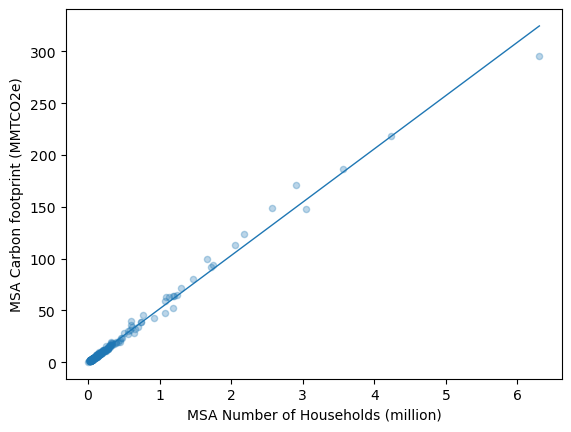

In [17]:
xa = df['hh_2014']/1e6
ya = df['cf']/1e6
g = sns.regplot(x=xa, y=ya, ci=None,scatter_kws=dict(alpha=0.3,s=20),line_kws=dict(lw=1))
g.set_ylabel('MSA Carbon footprint (MMTCO2e)')
g.set_xlabel('MSA Number of Households (million)')
plt.savefig('../../figures/cf_hh.png',dpi=300)

In [18]:
X = df['hh_2014'].values

In [19]:
Y = df['cf'].values

In [20]:
#Y

In [21]:
X = sm.add_constant(X, prepend=True)

In [22]:
#X

In [23]:
lm = sm.OLS(Y,X)

In [24]:
result = lm.fit()

In [25]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.846e+04
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:14:36   Log-Likelihood:                -5452.0
No. Observations:                 335   AIC:                         1.091e+04
Df Residuals:                     333   BIC:                         1.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.864e+04   1.69e+05      0.464      0.6

In [26]:
r_squared = list()
for i in list(cols_to_plot.columns):
    print('\033[1m', i, '\033[0m')
    X = df[i].values
    X = sm.add_constant(X, prepend = True)
    Y = df['cf'].values
    lm = sm.OLS(Y, X) 
    result = lm.fit()
    r_squared.append([result.rsquared, i])
    print(result.summary(),'\n')
#print(sorted(r_squared, reverse = True))

 households 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3838.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          7.42e-185
Time:                        14:14:36   Log-Likelihood:                -5825.5
No. Observations:                 335   AIC:                         1.165e+04
Df Residuals:                     333   BIC:                         1.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.098e+05   5.14e+05      1

MissingDataError: exog contains inf or nans